In [1]:
import psrchive
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
def Read_File(file_path, dedisperse = True):
    File = psrchive.Archive_load(file_path)
    File.tscrunch()
    if dedisperse == True:
        File.dedisperse()
    File.pscrunch()
    File.remove_baseline()
    dm = File.get_dispersion_measure()
    center_freq = File.get_centre_frequency()
    integration = File.get_first_Integration()
    period = integration.get_folding_period()
    File_Data = File.get_data()
    pulse = File_Data[0,0,:] #Select usable part of data
    
    #Get a list of the frequencies
    freq_mhz_table = File.get_frequency_table()
    freq_mhz = freq_mhz_table[0]
    
    
    return(pulse, freq_mhz, dm, center_freq, period)

In [3]:
file_path = '/srv/storage_11/galc/UBB/jtremblay/20230921/J1713+0747/folded_data/1614.84375/21:32:22_0016.ar'
training_data, freq_mhz, dm, center_freq, period = Read_File(file_path, dedisperse = True)

In [4]:
#Create cleaned data
train_RFI_chns = [503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 232, 233, 234, 235, 236, 263, 264, 265, 266, 267, 268, 269, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 621 ,622 ,623 ,624, 625, 626, 627, 628, 292, 293, 294, 295, 296, 297, 298, 299, 300, 139, 140, 141, 278, 279, 280, 281, 282, 370]

# Create a boolean mask with True for indices to exclude
mask_train = np.full_like(training_data, True, dtype=bool)
mask_train[train_RFI_chns] = False

# Use the mask to select all values except those at specified indices
training_data_no_RFI = training_data[mask_train]

Need to create two lists where one list is all the data and the second list is a list of true or false where true is good data and false is bad data.

In [5]:
true_values_train = [True] * len(training_data)
train_targets = [False if i in train_RFI_chns else value for i, value in enumerate(true_values_train)]

In [6]:
# X_train hold the features for training = all data (arrays of frequency) = what we learn from
# y_train hold the targets = what we want to predict = what we want to learn = True/False depending on if the corresponding array should be removed or not
# X_test = features that we will input in the model
# y_test = GROUND TRUTH = what we will compare the predictions with to compute accuracy
X_train, X_test, y_train, y_test = train_test_split(training_data, train_targets, test_size=0.2)

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [8]:
accuracy_score(y_test, predictions)

0.765625

Now we try to test on independent data so we will clean another file manually to create another file of true and false values

In [9]:
file_path = '/srv/storage_11/galc/UBB/jtremblay/20230921/J1713+0747/folded_data/1614.84375/21:32:22_0017.ar'
test_data, freq_mhz, dm, center_freq, period = Read_File(file_path, dedisperse = True)

In [10]:
print(np.shape(test_data))

(640, 1024)


In [11]:
test_RFI_chns = [506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 328, 329, 330, 331, 332, 591, 263, 264, 265, 266, 267, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 130, 140, 141, 233, 232, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 498, 499, 500, 455, 324, 325, 326, 327, 279, 280, 281, 282, 283, 268, 247, 248, 249, 250, 237, 238, 239, 240, 241, 242, 234, 224, 225, 226]

In [12]:
# Create a boolean mask with True for indices to exclude
mask_test = np.full_like(test_data, True, dtype=bool)
mask_test[test_RFI_chns] = False

# Use the mask to select all values except those at specified indices
test_data_no_RFI = test_data[mask_test]

true_values_test = [True] * len(test_data)
test_targets = [False if i in test_RFI_chns else value for i, value in enumerate(true_values_test)]

In [13]:
X_train = training_data
X_test = test_data
y_train = train_targets
y_test = test_targets

In [14]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [15]:
accuracy_score(y_test, predictions)

0.6734375

In [16]:
# Identify indices where array2 is False
false_indices = np.where(predictions == False)[0]

# Set values to NaN for the corresponding rows in array1
test_data[false_indices, :] = np.nan

In [17]:
# Check for NaN values
nan_mask = np.isnan(test_data)
np.nansum(nan_mask) / np.prod(test_data.shape) * 100

15.156249999999998

In [18]:
print(np.shape(test_data))
print(test_data)

(640, 1024)
[[ 3.1074269e-05  1.4701275e-04  5.8445125e-04 ...  1.1414824e-04
   4.6841591e-04 -6.4304339e-05]
 [ 5.6034396e-04  1.7546931e-04 -4.9602916e-04 ... -1.6330996e-05
   5.1084976e-04 -1.4029375e-04]
 [-7.1845850e-04  6.6286424e-04 -8.4244361e-04 ... -1.5647608e-04
   8.0992380e-04  4.0847165e-04]
 ...
 [ 1.6812048e-03 -4.2893924e-03  2.9114600e-02 ...  4.7656260e-03
  -1.0951165e-02  6.3216302e-04]
 [-1.5557035e-02 -1.2868389e-02  1.3597623e-02 ... -8.4645590e-03
   2.1521016e-03 -4.1820840e-03]
 [ 3.4141075e-04 -3.1777071e-03 -4.7743786e-04 ...  9.9551212e-04
   3.0703498e-03  3.8928939e-03]]


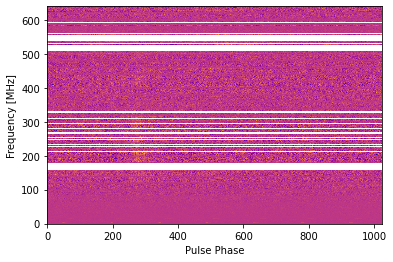

In [19]:
plt.imshow(test_data, aspect='auto', cmap=plt.get_cmap('plasma'), interpolation='none', origin='lower')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Pulse Phase')
plt.show()